In [47]:
import cv2
import numpy as np

from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

import matplotlib.pyplot as plt

In [48]:
img = cv2.imread('coins.jpg')

Remoção de ruído antes de Watershed

In [49]:
filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)


Imagem em tom de cinza e binarização da imagem




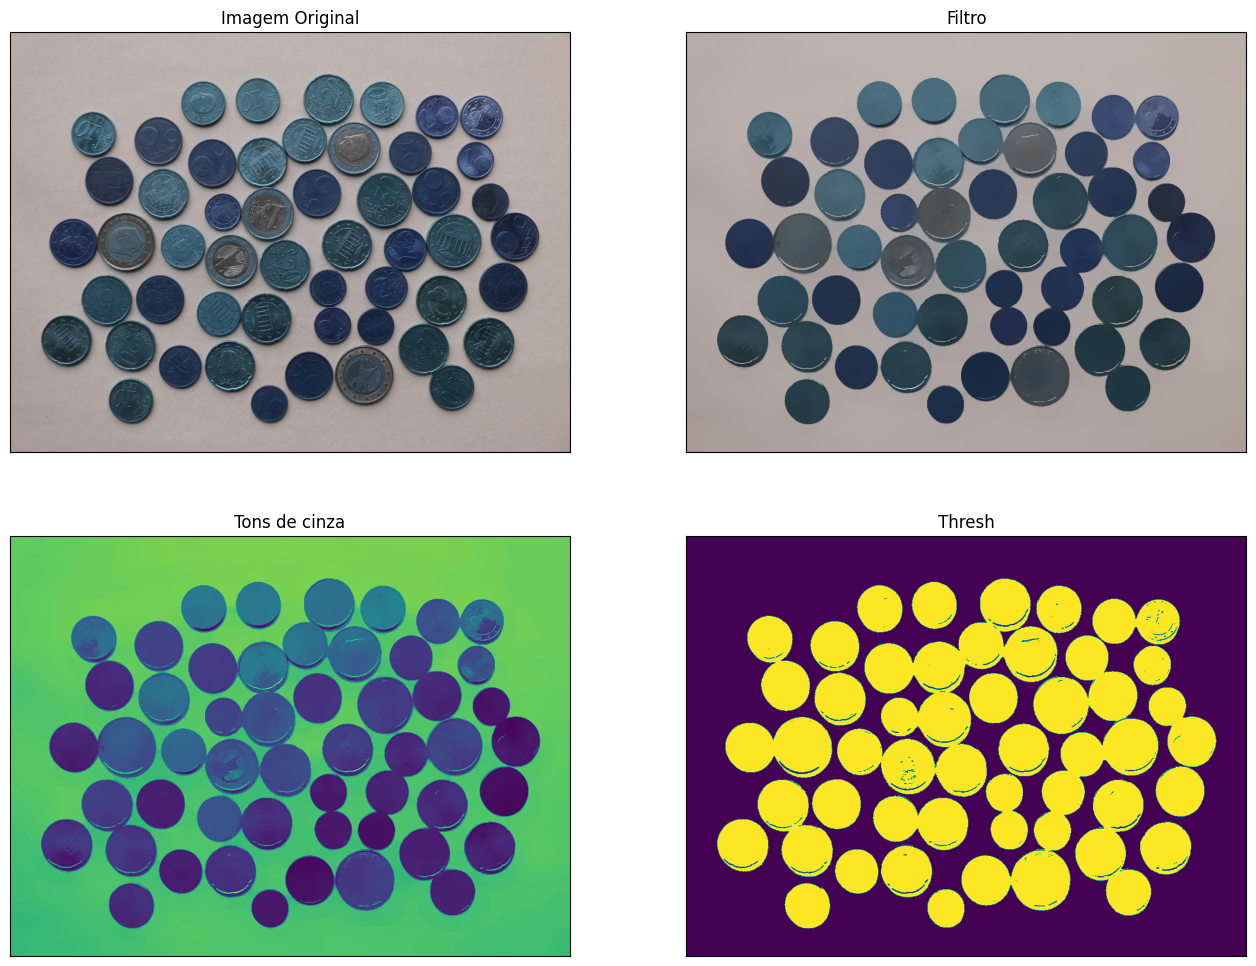

In [50]:
gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

titulos = ['Imagem Original', 'Filtro', 'Tons de cinza', 'Thresh']
imagens = [img, filtro, gray, thresh]

fig = plt.gcf()
fig.set_size_inches(16, 12)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imagens[i])
    plt.title(titulos[i]) 
    plt.xticks([]),plt.yticks([])     

plt.show()

Preenchimento dos buracos

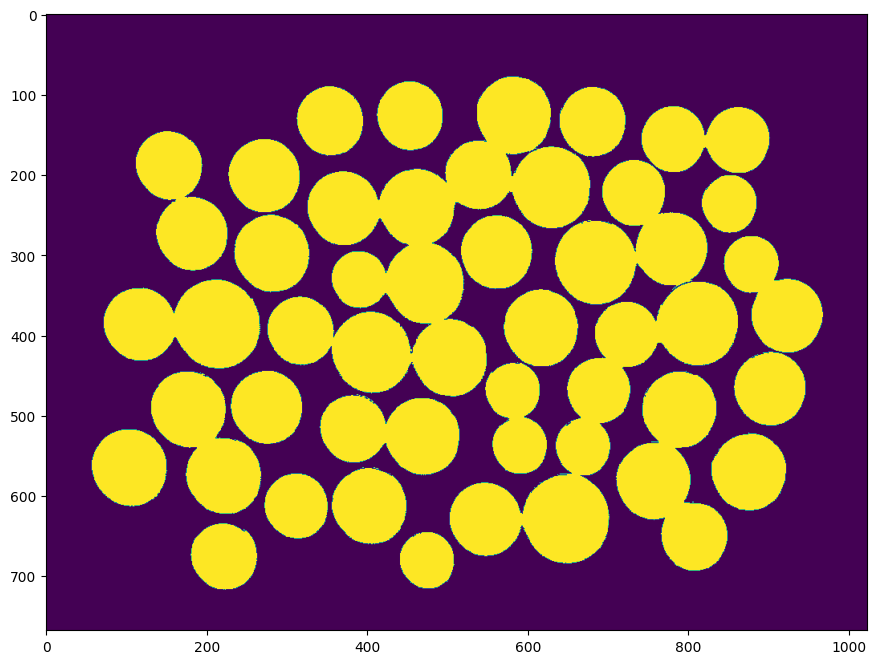

In [51]:
contornos, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
buracos = []

for con in contornos:
    area = cv2.contourArea(con)
    if area < 1000:
        buracos.append(con)
        
cv2.drawContours(thresh, buracos, -1, 255, -1)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.imshow(thresh)

Cálculo da distância

In [52]:
dist = ndi.distance_transform_edt(thresh, cv2.DIST_L2)
dist_visual = dist.copy()

Máximos locais

In [53]:
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)

<ipython-input-53-c66a18f3b6de>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


Marcar labels

In [54]:
markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]

WATERSHED

In [55]:
labels = watershed(-dist, markers, mask=thresh)

Plot

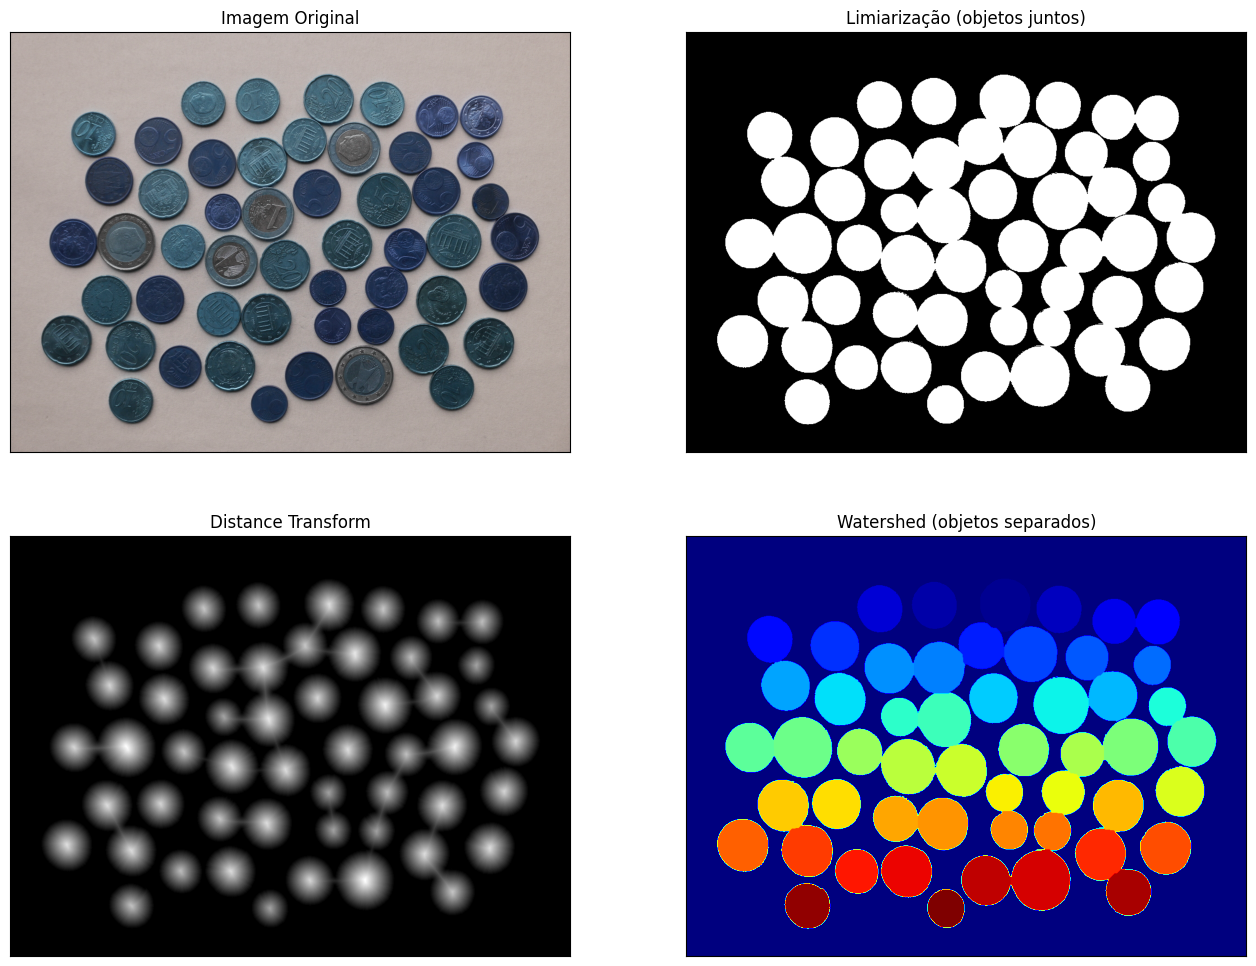

In [56]:
titulos = ['Imagem Original', 'Limiarização (objetos juntos)', 'Distance Transform', 'Watershed (objetos separados)']
imagens = [img, thresh, dist_visual, labels]

fig = plt.gcf()
fig.set_size_inches(16, 12)  
for i in range(4):
    plt.subplot(2,2,i+1)
    # condição para colocar colormap jet apenas pra imagem com o resultado do watershed
    if (i == 3):
        cmap = "jet"
    else:
        cmap = "gray"
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i]) 
    plt.xticks([]),plt.yticks([])     
plt.show()